<a href="https://colab.research.google.com/github/Ramaseshanr/anlp/blob/master/BigramLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This code may have snippets taken from the Internet
import nltk
from nltk import bigrams
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
nltk.download('gutenberg')
nltk.download('punkt_tab')

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
import collections
from collections import Counter
from nltk.corpus import gutenberg

# corpusdir = '/your/Corpus/'  # point to the Directory of corpus.
# your_corpus = PlaintextCorpusReader(corpusdir, '.*')

#compute the bigram model
def build_bigram_model():
    bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
    for sentence in gutenberg.sents("austen-emma.txt"):
        sentence = [word.lower() for word in sentence if word.isalpha()]  # get alpha only
        #Collect all bigrams counts for (w1,w2)
        for w1, w2 in bigrams(sentence):
            bigram_model[w1][w2] += 1
        #compute the probability for the bigram starting with w1
        for w1 in bigram_model:
            #total count of bigrams starting with w1
            bigram_count_4_w1 = float(sum(bigram_model[w1].values()))
            #distribute the probability mass for all bigrams starting with w1
            for w2 in bigram_model[w1]:
                bigram_model[w1][w2] /= bigram_count_4_w1
    return bigram_model

In [ ]:
    model = build_bigram_model()

In [ ]:
def predict_next_word(first_word):
    #get the next for the bigram starting with 'word'
    second_word = model[first_word]
    #get the top 10 words whose first word is 'first_word'
    top10words = Counter(second_word).most_common(10)


    predicted_words = list(zip(*top10words))[0]
    probability_score = list(zip(*top10words))[1]
    x_pos = np.arange(len(predicted_words))

    # calculate slope and intercept for the linear trend line
    # slope, intercept = np.polyfit(x_pos, probability_score, 1)

    plt.bar(x_pos, probability_score,align='center')
    plt.xticks(x_pos, predicted_words)
    plt.ylabel('Probability Score')
    plt.xlabel('Predicted Words')
    plt.title('Predicted words for ' + first_word)
    plt.show()

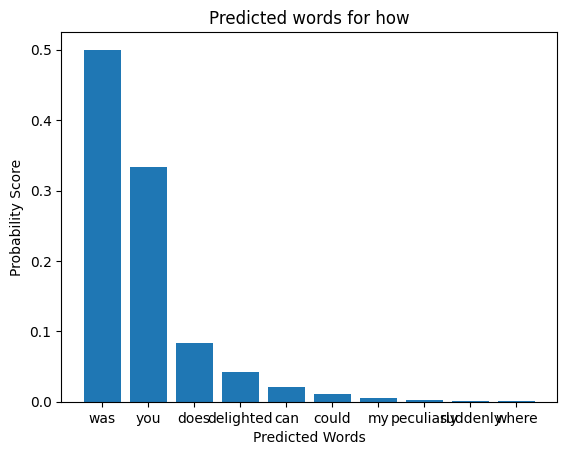

In [ ]:
predict_next_word('how')